In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bgt_reader import get_properties, WMTS_calculator, bgt_classifier
from helpers import wgs_to_rd
from matplotlib import cm
import shapefile as shp  
from matplotlib.lines import Line2D

In [2]:
wegen_kh = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Verhardingen\kunststof_halfverh_boom.csv")
wegen_ab = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Verhardingen\asfalt_beton_boom.csv")
wegen_punten = pd.concat([wegen_kh, wegen_ab], axis=0)
# wegen_punten.to_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Verhardingen\wegen_punten.csv")
wegen_shapes = shp.Reader(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Verhardingen\Planning2021_v2_boomwortelopdruk.dbf")

In [3]:
def add_patch(legend):
    from matplotlib.patches import Patch
    ax = legend.axes

    handles, labels = ax.get_legend_handles_labels()
    handles.append(Patch(facecolor='w', edgecolor='black'))
    labels.append("shapefile inspection")

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())


In [4]:
def plotfunc(df_static, df_treedict, df_treegrowth, sia_x, sia_y, xlim, ylim, area):
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,8))
#     legend_elements = [Line2D([0], [0], marker='x', color='w', markerfacecolor='black', label='point inspection'),
#                 Line2D([0], [0], marker='x', color='w', markerfacecolor='red', label='civilian notification'),
#                 ]
    
    im = axs[1, 0].scatter(df_treedict['rdx'], df_treedict['rdy'], c=df_treedict['count'])
    axs[1, 0].set_title('tree dictionary')
    axs[1, 0].set_ylabel('RD y (m)', fontsize=14)
    axs[1, 0].set_xlabel('RD x (m)', fontsize=14)

    axs[0, 1].scatter(df_static['rdx'], df_static['rdy'], c=df_static['count'])
    axs[0, 1].set_title('static')

    axs[1, 1].scatter(df_treegrowth['rdx'], df_treegrowth['rdy'], c=df_treegrowth['count'])
    axs[1, 1].set_title('tree growth')
    axs[1, 1].set_xlabel('RD x (m)', fontsize=14)

    for shape in wegen_shapes.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]] 
        try:
            weight = shape.record['CROW_ONEFF'][0]
        except:
            continue
        if weight == 'E':
            color='Black'
        elif weight == 'M':
            color='dimgrey'
        elif weight == 'L':
            color='silver'
        else:
            continue
        axs[0, 0].plot(x, y, zorder=-1, color=color)
        axs[0, 1].plot(x, y, zorder=-1, color=color)
        axs[1, 0].plot(x, y, zorder=-1, color=color)
        axs[1, 1].plot(x, y, zorder=-1, color=color)

    axs[0, 0].set_title('root damage')
    axs[0, 0].set_ylabel('RD y (m)', fontsize=14)
    size = 150
    axs[0, 0].scatter(wegen_punten['X'], wegen_punten['Y'], c='blue', marker='x', s=size, label='point inspection') 
    axs[0, 1].scatter(wegen_punten['X'], wegen_punten['Y'], c='blue', marker='x', s=size) 
    axs[1, 0].scatter(wegen_punten['X'], wegen_punten['Y'], c='blue', marker='x', s=size) 
    axs[1, 1].scatter(wegen_punten['X'], wegen_punten['Y'], c='blue', marker='x', s=size) 
    axs[0, 0].scatter(sia_x, sia_y, c='red', marker='x', s=size, label='civilian notification')
    axs[0, 1].scatter(sia_x, sia_y, c='red', marker='x', s=size, label='civilian notification') 
    axs[1, 0].scatter(sia_x, sia_y, c='red', marker='x', s=size, label='civilian notification') 
    axs[1, 1].scatter(sia_x, sia_y, c='red', marker='x', s=size, label='civilian notification') 
    
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    cbar = fig.colorbar(im, ax=axs.ravel().tolist(), orientation='vertical')
    cbar.set_label('intersection score', fontsize=14)
    cbar.ax.tick_params(labelsize=12)
    lgd = axs[0,0].legend(framealpha=0.9)
    add_patch(lgd)
#     plt.tight_layout()
    fig.autofmt_xdate()
    plt.savefig('plots/opdruk_scatter_{}'.format(area), dpi=300)
    plt.show()

## Wallengebied

In [5]:
df_wallen_static = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallengebied_2020_static.csv")
df_wallen_treedict = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallengebied_2020_treedict.csv")
df_wallen_treegrowth = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallengebied_2020_treegrowth.csv")

sia_wallen = pd.read_excel(r'C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Meldingen\Meldingen_Centrum.xlsx')
sia_wallen_x = []
sia_wallen_y = []
for index, row in sia_wallen.iterrows():
    lat = row['LATITUDE']
    lng = row['LONGITUDE']
    if type(lat)==str:
        lat = float(lat.replace(',', '.'))
    rd_x, rd_y = wgs_to_rd(lat, lng)
    sia_wallen_x.append(rd_x)
    sia_wallen_y.append(rd_y)
sia_wallen['x'] = sia_wallen_x
sia_wallen['y'] = sia_wallen_y
# display(sia_wallen)
# sia_wallen.to_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Meldingen\sia_wallen.csv")


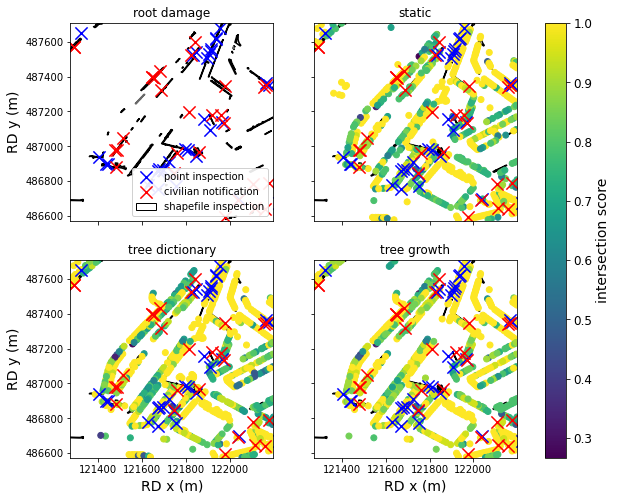

In [6]:
xlim = (121273, 122198)
ylim = (486573, 487709)
area = 'wallen'
plotfunc(df_wallen_static, df_wallen_treedict, df_wallen_treegrowth, sia_wallen_x, sia_wallen_y, xlim=xlim, ylim=ylim, area=area)

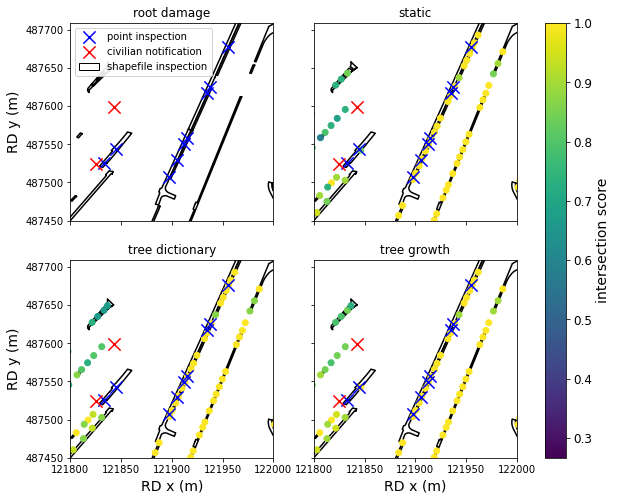

In [7]:
xlim = (121800, 122000)
ylim = (487450, 487709)
area = 'wallen_zoom'
plotfunc(df_wallen_static, df_wallen_treedict, df_wallen_treegrowth, sia_wallen_x, sia_wallen_y, xlim=xlim, ylim=ylim, area=area)

## IJburg

In [8]:
df_ijburg_static = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_2020_static.csv")
df_ijburg_treedict = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_2020_treedict.csv")
df_ijburg_treegrowth = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_2020_treegrowth.csv")

sia_ijburg = pd.read_excel(r'C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Meldingen\Meldingen_IJburg.xlsx')
sia_ijburg_x = []
sia_ijburg_y = []
for index, row in sia_ijburg.iterrows():
    lat = row['LATITUDE']
    lng = row['LONGITUDE']
    if type(lat)==str:
        lat = float(lat.replace(',', '.'))
    rd_x, rd_y = wgs_to_rd(lat, lng)
    sia_ijburg_x.append(rd_x)
    sia_ijburg_y.append(rd_y)
sia_ijburg['x'] = sia_ijburg_x
sia_ijburg['y'] = sia_ijburg_y
sia_ijburg.to_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Meldingen\sia_ijburg.csv")


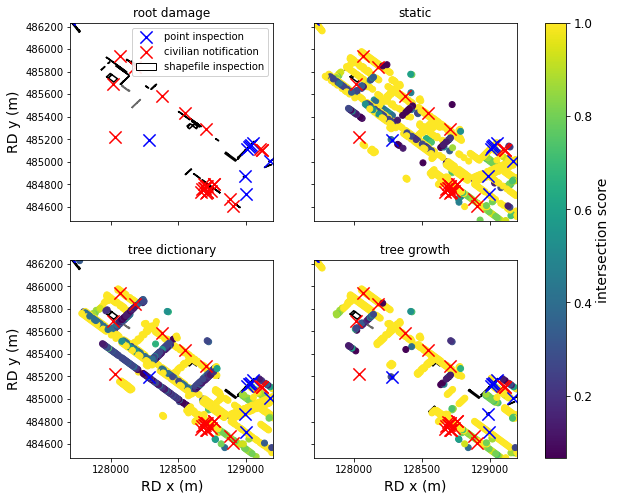

In [9]:
xlim = (127701, 129202)
ylim = (484478, 486233)
area = 'ijburg'
plotfunc(df_ijburg_static, df_ijburg_treedict, df_ijburg_treegrowth, sia_ijburg_x, sia_ijburg_y, xlim=xlim, ylim=ylim, area=area)


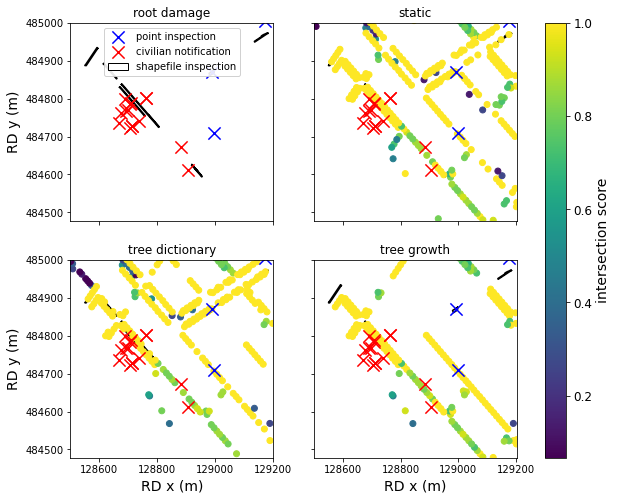

In [10]:
xlim = (128500, 129202)
ylim = (484478, 485000)
area = 'ijburg_zoom'
plotfunc(df_ijburg_static, df_ijburg_treedict, df_ijburg_treegrowth, sia_ijburg_x, sia_ijburg_y, xlim=xlim, ylim=ylim, area=area)


## Sarphati

In [11]:
df_sarphati_static = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_2020_static.csv")
df_sarphati_treedict = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_2020_treedict.csv")
df_sarphati_treegrowth = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_2020_treegrowth.csv")

sia_sarphati = pd.read_excel(r'C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Meldingen\Meldingen_Zuid.xlsx')
sia_sarphati_x = []
sia_sarphati_y = []
for index, row in sia_sarphati.iterrows():
    lat = row['LATITUDE']
    lng = row['LONGITUDE']
    if type(lat)==str:
        lat = float(lat.replace(',', '.'))
    rd_x, rd_y = wgs_to_rd(lat, lng)
    sia_sarphati_x.append(rd_x)
    sia_sarphati_y.append(rd_y)
sia_sarphati['x'] = sia_sarphati_x
sia_sarphati['y'] = sia_sarphati_y
sia_sarphati.to_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Meldingen\sia_sarphati.csv")


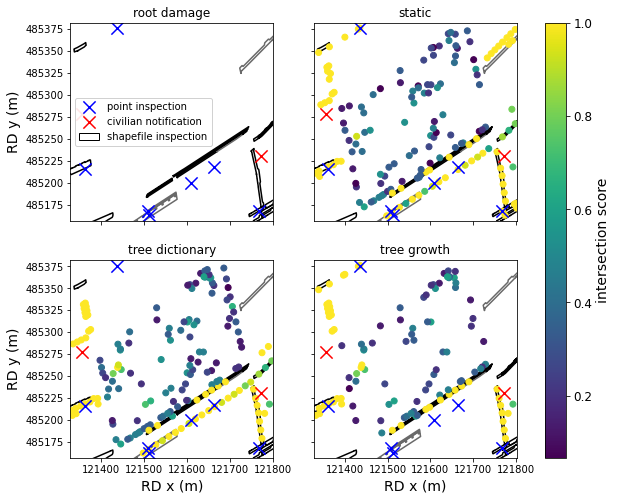

In [12]:
xlim = (121328, 121802)
ylim = (485157, 485382)
area = 'sarphati'
plotfunc(df_sarphati_static, df_sarphati_treedict, df_sarphati_treegrowth, sia_sarphati_x, sia_sarphati_y, xlim=xlim, ylim=ylim, area=area)
